# Employee Attrition Prediction

In [418]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import warnings
warnings.simplefilter("ignore")

In [419]:
df = pd.read_csv('hrdata.csv')

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Cleaning

##### Checking the dataset for null values

In [421]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Removing redundant columns

In [422]:
df.Over18.unique()

array(['Y'], dtype=object)

In [423]:
df.EmployeeCount.unique()

array([1])

In [424]:
df.StandardHours.unique()

array([80])

In [425]:
df = df.drop(['Over18','EmployeeCount','StandardHours',], axis=1)

#### Mapping the categorical text data to dummy integer values

In [426]:
#df = df.drop(['Over18'], axis = 1)
mappingBusinesTravel = {'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 3}
mappingBinary = {'Yes': 1, 'No': 0}
mappingDept = {'Sales':1,'Research & Development':2,'Human Resources':3}
mappingGender = {'Female':2, 'Male':1}
mappingMaritalStatus = {'Single':1,'Married':2,'Divorced':3}
mappingEduField = {'Life Sciences':1, 'Other':6, 'Medical':2, 'Marketing':3,
       'Technical Degree':4, 'Human Resources':5}
mappingJobRole = {'Sales Executive':1, 'Research Scientist':2, 'Laboratory Technician':3,
       'Manufacturing Director':4, 'Healthcare Representative':5, 'Manager':6,
       'Sales Representative':7, 'Research Director':8, 'Human Resources':9}
df = df.replace({'BusinessTravel': mappingBusinesTravel,'Attrition':mappingBinary,'Department':mappingDept,
                 'OverTime':mappingBinary,'MaritalStatus':mappingMaritalStatus,
                 'Gender':mappingGender,'JobRole':mappingJobRole,'EducationField':mappingEduField})
df.JobRole.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

#### Verifying the data

In [428]:
df.sample(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
188,34,0,2,1069,2,2,1,1,256,4,...,3,3,0,10,2,2,10,9,1,9
87,51,0,1,432,2,9,4,1,116,4,...,4,2,2,10,4,3,4,2,0,3
1355,36,0,1,335,1,17,2,3,1908,3,...,3,3,2,12,1,1,4,2,1,3
568,55,1,1,725,2,2,3,2,787,4,...,3,4,1,24,2,3,5,2,1,4
1346,45,0,1,556,2,25,2,1,1888,2,...,3,4,2,10,2,2,9,8,3,8
371,29,0,1,1283,2,23,3,1,495,4,...,3,4,0,6,4,3,3,2,1,2
873,36,0,1,917,2,6,4,1,1221,3,...,3,3,1,7,4,3,7,7,1,7
383,22,0,1,253,2,11,3,2,511,1,...,3,4,1,2,1,3,2,1,1,2
893,29,0,1,1010,2,1,3,1,1249,1,...,3,1,3,3,5,3,3,2,1,2
968,36,0,2,607,1,7,3,3,1362,1,...,3,4,1,17,2,2,15,7,6,13


# Exploratory Data Analysis

######  Overall, male employees tend to leave the job almost twice as much as their female counterpart:

<AxesSubplot:xlabel='Gender'>

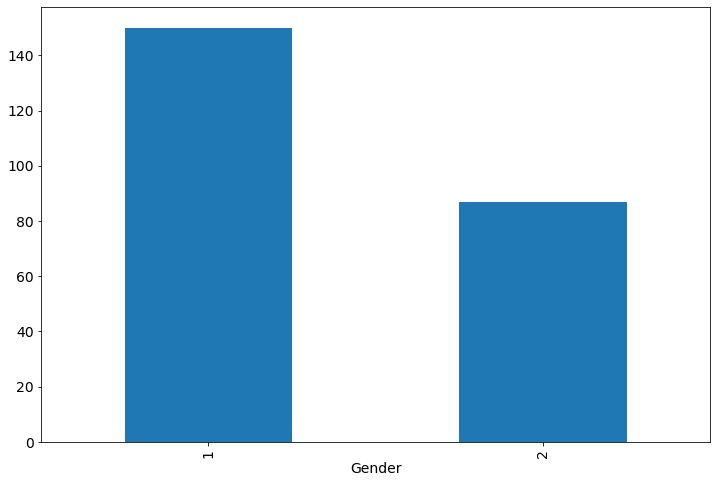

In [429]:
tmp = df[df['Attrition'] == 1]
tmp.groupby('Gender').size().plot.bar()

#### Single employees tend to leave more often

<AxesSubplot:xlabel='MaritalStatus'>

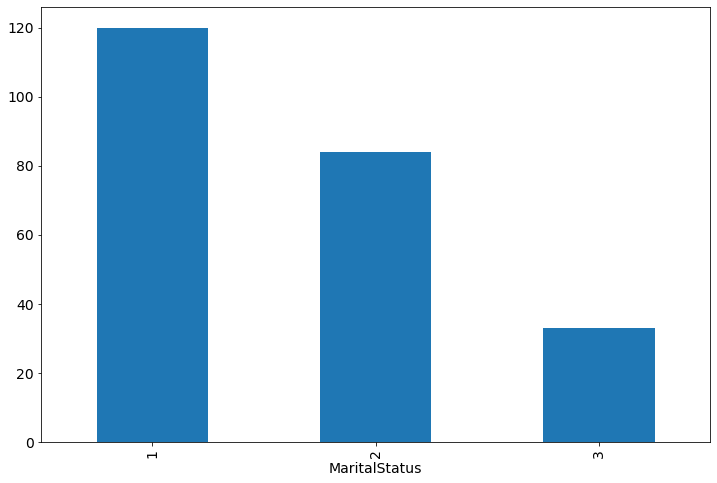

In [430]:
tmp.groupby('MaritalStatus').size().plot.bar()

###### Insightful feature variables distribution in the dataset

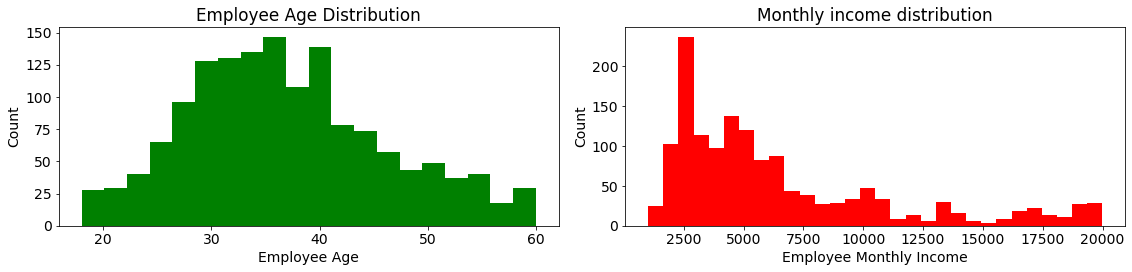

In [431]:
fig = plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.hist(df['Age'], bins=20, color='green')
plt.title('Employee Age Distribution')
plt.xlabel("Employee Age")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(df['MonthlyIncome'], bins=30, color='red')
plt.title('Monthly income distribution')
plt.xlabel("Employee Monthly Income")
plt.ylabel("Count")

fig.tight_layout();

#### Monthy income seems to have a great impact on attrition from the below boxplot

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

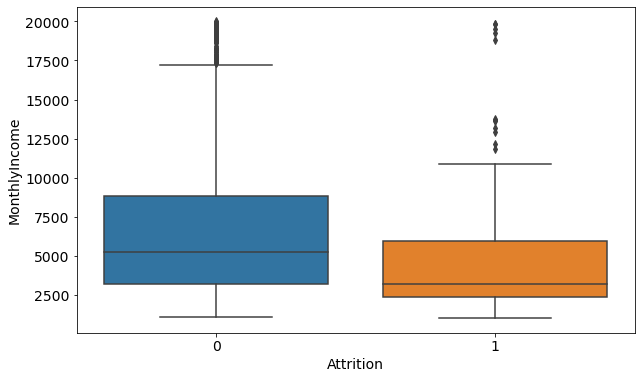

In [432]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = df)

# Feature Engineering

###### Checking for highly correlated variables and removing them

In [433]:
cor_matrix = df.corr().abs()

<AxesSubplot:>

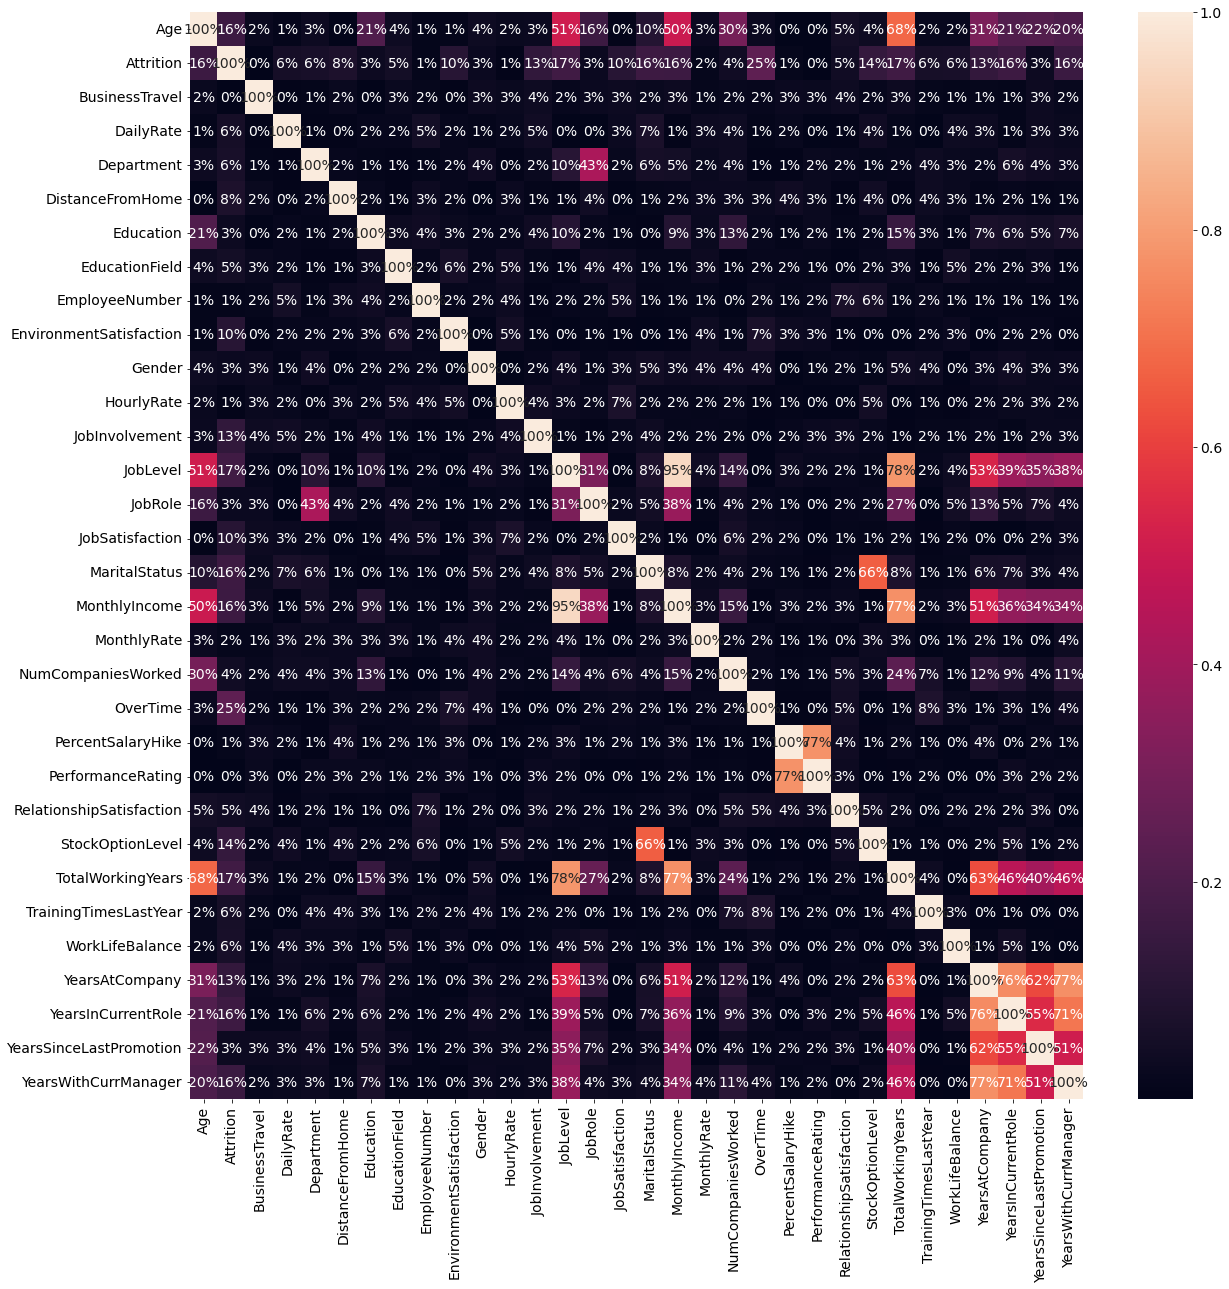

In [434]:
plt.figure(figsize=(20, 20))
sns.heatmap(cor_matrix, 
        xticklabels=cor_matrix.columns,
        yticklabels=cor_matrix.columns, annot=True, fmt='.0%')

### Removing correlated variables
The highly correlated data in our feature set are removed

In [435]:
df = df.drop(['TotalWorkingYears','JobLevel','YearsAtCompany','YearsWithCurrManager'],
             axis=1)

# Model Training

In [436]:
X = df.drop('Attrition', axis = 1)
Y = df['Attrition']

#### Splitting the data into training and testing sets with 75% going to training set and 25% to the testing set

In [437]:
#Test train split:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

### Random Forest

In [438]:
#Create the model and train
RandomForestmodel = RandomForestClassifier()
RandomForestmodel.fit(X_train,y_train)

RandomForestClassifier()

In [439]:
#predict the results for test
y_pred = RandomForestmodel.predict(X_test)
#test the accuracy
accuracy_score(y_test, y_pred)

0.8342391304347826

In [440]:
f1_score(y_test, y_pred, average=None)

array([0.90715373, 0.2278481 ])

#### The accuracy score from the above is fairly good but we observe that the f-1 metric is oddly low for one class. We now confirm the performance of our model with a classification report.

In [441]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       300
           1       0.82      0.13      0.23        68

    accuracy                           0.83       368
   macro avg       0.83      0.56      0.57       368
weighted avg       0.83      0.83      0.78       368



### We observe that even though we obtain a high overall accuracy score, the f1 metric and the recall for attrition is very less. We futher explore the data to understand why this is occuring

<AxesSubplot:xlabel='Attrition', ylabel='count'>

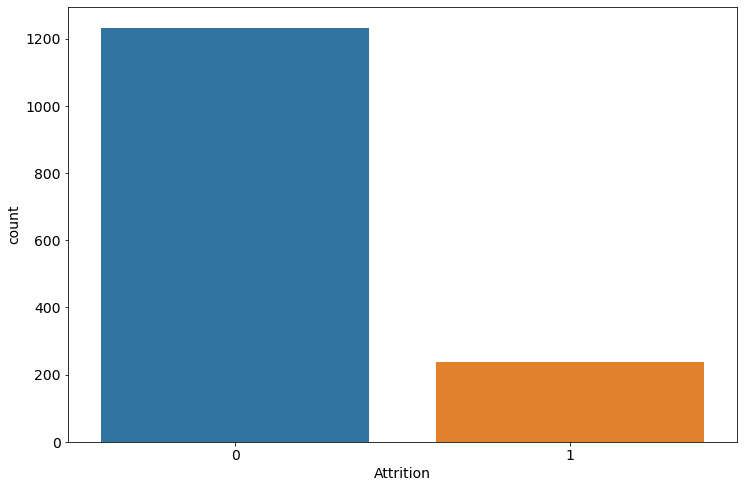

In [442]:
sns.countplot(df['Attrition'])

##### We observe that the number of records for attrition and non attrition is unevenly balanced.

<AxesSubplot:>

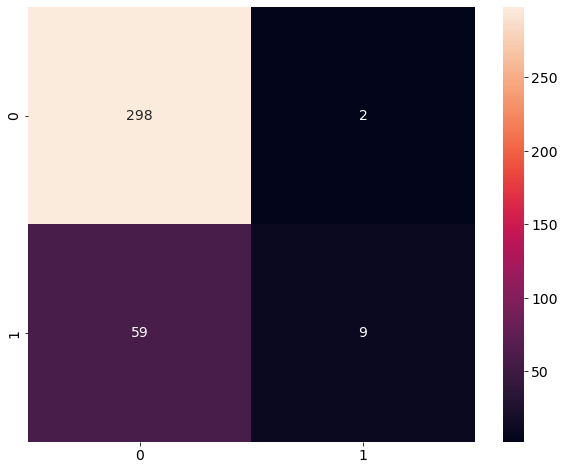

In [443]:
cf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix, annot=True, fmt='d')

##### From the above confusion matrix, we confirm the imbalance in the class sizes. This skews our prediction and gives us an illusion of high accuracy albeit the very low accuracy to predict true-positive in case of attrition=true scenario. From the confusion matrix, we observe a Type-2 error with false negative predictions of attrition data.

##### Since the number of records for attrition=true is very less, we perform oversampling of the dataset to even out the difference. Here we use SMOTE(Synthetic Minority Oversampling Technique) for oversampling

In [444]:
from imblearn.over_sampling import SMOTE

In [445]:
smt = SMOTE()
x_res, y_res = smt.fit_resample(X, Y)
#New test train split:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=10)

##### Result class sizes after oversampling. We see that our data is now balanced

<AxesSubplot:xlabel='Attrition', ylabel='count'>

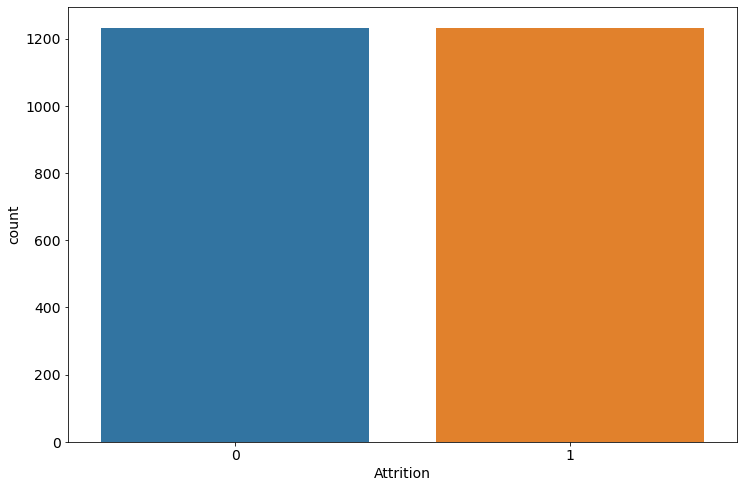

In [446]:
sns.countplot(y_res)

#### Fitting the Random forest model with the data obtained post oversampling

In [452]:
#Fit the new training set with the existing random forest model
RandomForestmodel.fit(X_train,y_train)
#predict the results for test
y_pred = RandomForestmodel.predict(X_test)
#test the accuracy
accuracy_score(y_test, y_pred)*100

90.11345218800648

In [453]:
f1_score(y_test, y_pred, average=None)

array([0.90513219, 0.89678511])

In [454]:
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       311
           1       0.93      0.87      0.90       306

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617

Accuracy: 90.11345218800648 %


#### Now we see that our f1 score is high for both the classes

#### We can try to further improve the model by tweaking the hyperparameters and observe the result

In [455]:
#Create the model and train
RandomForestmodelImproved = RandomForestClassifier(max_depth=40, random_state=0, 
                                                   n_estimators=150, max_features="log2", bootstrap=False)
RandomForestmodelImproved.fit(X_train,y_train)
#predict the results for test
y_pred = RandomForestmodelImproved.predict(X_test)
#test the accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       311
           1       0.95      0.89      0.92       306

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617

Accuracy: 92.05834683954619 %


##### We see marginal improvements in the classification report above. We also see ~2% increase in the accuracy score. 

#### We check for the highly influential features in our Random forest model

<BarContainer object of 27 artists>

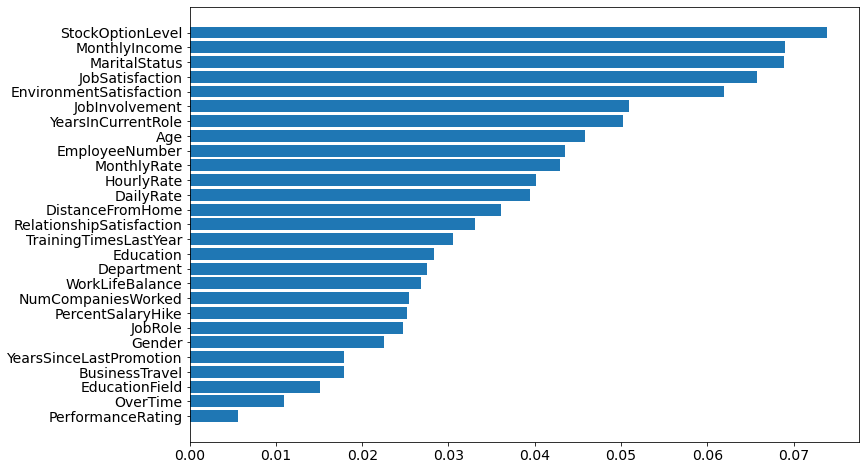

In [285]:
sorted_idx = RandomForestmodel.feature_importances_.argsort()
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.barh((np.asarray(X.columns))[sorted_idx], RandomForestmodel.feature_importances_[sorted_idx])

##### We try to boost using gradient boosting below:

In [287]:
#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       311
           1       0.90      0.89      0.90       306

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617

Accuracy: 89.62722852512157 %


#### Logistic Regression

In [288]:
logisticRegModel = LogisticRegression()
logisticRegModel.fit(X_train, y_train)
y_pred = logisticRegModel.predict(X_test)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average=None)
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       311
           1       0.69      0.72      0.70       306

    accuracy                           0.70       617
   macro avg       0.70      0.70      0.70       617
weighted avg       0.70      0.70      0.70       617

Accuracy: 70.01620745542951 %


##### We can further try to improve the logistic regression model by adding cross validation.
##### Logistic Regression with cross validation

In [289]:
logisticRegModelCV = LogisticRegressionCV(cv=50, random_state=0)
logisticRegModelCV.fit(X_train, y_train)
y_pred = logisticRegModelCV.predict(X_test)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average=None)
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       311
           1       0.76      0.77      0.76       306

    accuracy                           0.76       617
   macro avg       0.76      0.76      0.76       617
weighted avg       0.76      0.76      0.76       617

Accuracy: 76.17504051863857 %
